# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [26]:
# Your code here: split the data into training and test sets 
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = ames.drop('SalePrice', axis=1)
y = ames['SalePrice']

# Perform train-test split with default test size (0.25) and set a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 79), (365, 79), (1095,), (365,))

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [27]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [28]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_model = LinearRegression()


In [29]:
# Your code here: fit the model to train data
linear_model.fit(X_train, y_train)  

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [31]:
# Your code here: generate predictions for both sets
 #Generate predictions on the training data
y_train_pred = linear_model.predict(X_train)

# Generate predictions on the test data
y_test_pred = linear_model.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [32]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

# Calculate MSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

Training MSE: 1772517384.98
Test MSE: 1982741233.37


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

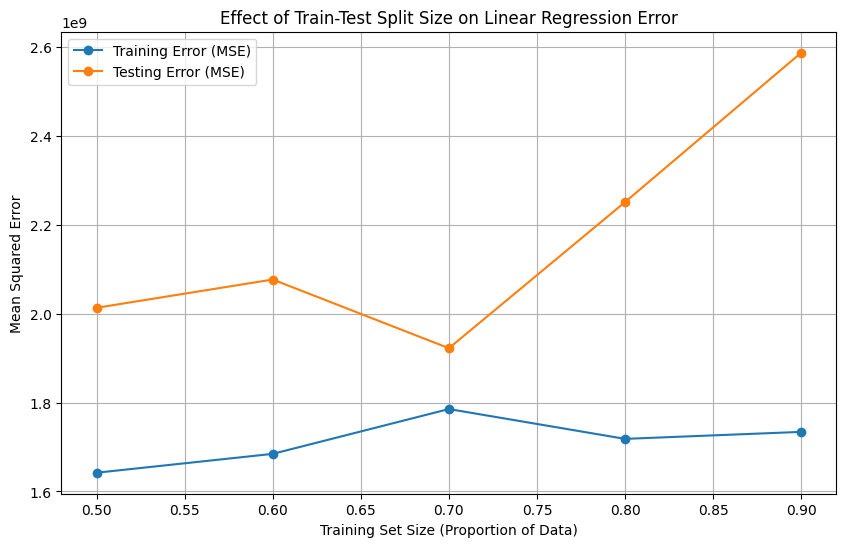

In [38]:
# Your code here

import matplotlib.pyplot as plt


# Define features and target
y_original = ames['SalePrice']
X_original = ames.drop(columns=['SalePrice'])

# Define the range of train sizes to iterate over
train_sizes = np.arange(0.5, 1.0, 0.1)
test_sizes = 1 - train_sizes

# Lists to store the training and testing errors for each split
train_errors = []
test_errors = []

# Define the continuous and categorical features
continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate the transformers outside the loop
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Loop through different train sizes
for train_size in train_sizes:
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_original, y_original, train_size=train_size, random_state=42
    )

    # Fit the transformers on the current training data
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])

    # Transform the training data
    X_train_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)

    # Transform the test data
    X_test_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)

    # Instantiate and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train_transformed, y_train)

    # Generate predictions and calculate MSE for the training set
    y_train_pred = linear_model.predict(X_train_transformed)
    mse_train = mean_squared_error(y_train, y_train_pred)
    train_errors.append(mse_train)

    # Generate predictions and calculate MSE for the test set
    y_test_pred = linear_model.predict(X_test_transformed)
    mse_test = mean_squared_error(y_test, y_test_pred)
    test_errors.append(mse_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error (MSE)', marker='o')
plt.plot(train_sizes, test_errors, label='Testing Error (MSE)', marker='o')
plt.title('Effect of Train-Test Split Size on Linear Regression Error')
plt.xlabel('Training Set Size (Proportion of Data)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

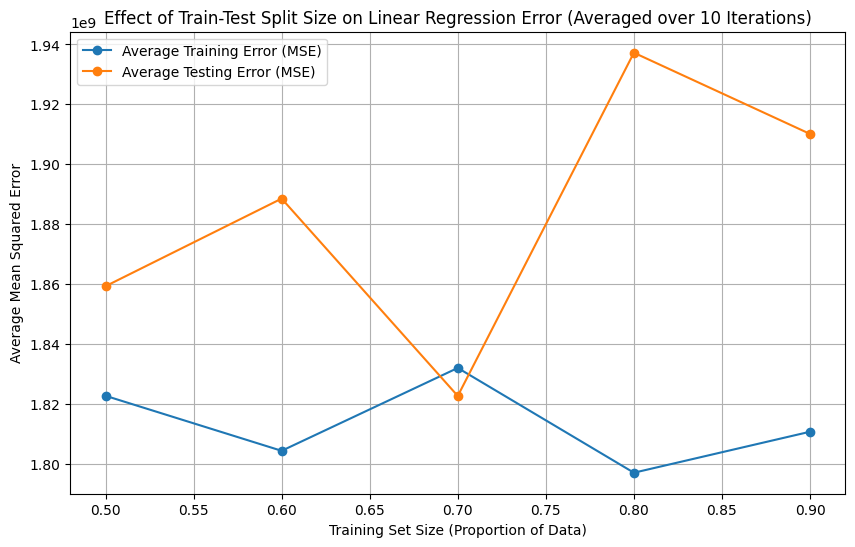

In [39]:
# Your code here

# Define features and target
y_original = ames['SalePrice']
X_original = ames.drop(columns=['SalePrice'])

# Define the range of train sizes to iterate over
train_sizes = np.arange(0.5, 1.0, 0.1)
test_sizes = 1 - train_sizes

# Number of iterations for each split size
n_iterations = 10

# Lists to store the average training and testing errors for each split
avg_train_errors = []
avg_test_errors = []

# Define the continuous and categorical features
continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate the transformers outside the main loops
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Loop through different train sizes
for train_size in train_sizes:
    all_train_errors = []
    all_test_errors = []
    for i in range(n_iterations):
        # Perform the train-test split with a different random state for each iteration
        X_train, X_test, y_train, y_test = train_test_split(
            X_original, y_original, train_size=train_size, random_state=42 + i
        )

        # Fit the transformers on the current training data
        log_transformer.fit(X_train[continuous])
        ohe.fit(X_train[categoricals])

        # Transform the training data
        X_train_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)

        # Transform the test data
        X_test_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)

        # Instantiate and train the Linear Regression model
        linear_model = LinearRegression()
        linear_model.fit(X_train_transformed, y_train)

        # Generate predictions and calculate MSE for the training set
        y_train_pred = linear_model.predict(X_train_transformed)
        mse_train = mean_squared_error(y_train, y_train_pred)
        all_train_errors.append(mse_train)

        # Generate predictions and calculate MSE for the test set
        y_test_pred = linear_model.predict(X_test_transformed)
        mse_test = mean_squared_error(y_test, y_test_pred)
        all_test_errors.append(mse_test)

    # Calculate the average errors across all iterations for the current split size
    avg_train_error = np.mean(all_train_errors)
    avg_test_error = np.mean(all_test_errors)
    avg_train_errors.append(avg_train_error)
    avg_test_errors.append(avg_test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, avg_train_errors, label='Average Training Error (MSE)', marker='o')
plt.plot(train_sizes, avg_test_errors, label='Average Testing Error (MSE)', marker='o')
plt.title('Effect of Train-Test Split Size on Linear Regression Error (Averaged over 10 Iterations)')
plt.xlabel('Training Set Size (Proportion of Data)')
plt.ylabel('Average Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

What's happening here? Evaluate your result!


*The original plot likely shows the noise and variability inherent in a single train-test split, while the last plot provides a clearer signal by averaging out this noise. 
The significant differences underscore the value of robust evaluation techniques like repeated cross-validation or, in this case, repeated train-test splits with averaging*

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.